# Read Data

In [12]:
import pandas as pd
import numpy as np

# T2 = pd.read_csv('StataReg/CountyVaccineMarch27.csv')
# T2 = pd.read_csv('StataReg/CountyVaccineApril07.csv')
T2 = pd.read_csv('StataReg/CountyVaccineApril19.csv')
# first processing
T2 = T2[-T2['Vax_Disparity'].isna()]
T2 = T2[T2['Vax_White'] < 1]
T2 = T2[T2['Vax_Black'] < 1]
print(T2.shape)
# print(T2.shape)

T2

(1199, 127)


,State,County,AreaName,FIPS,Vax_White,Vax_Black,VaxNumb_White,VaxNumb_Black,Total_Whole,Total_White,...,HighSchool_Disparity,Bachelor_Disparity,IT_Disparity,CnoI_Disparity,noC_Disparity,Above75_Disparity,Unemployment_Disparity,MeanIncome_Disparity,MedianIncome_Disparity,FluVax_Disparity
0,California,Alameda,"Alameda, California",6001,0.272713,0.270879,224604.927990,49941.375150,1671329,823593,...,0.015,0.232,0.096,-0.053,-0.044,0.004083,-0.048,24218.0,56757.0,0.24
1,California,Amador,"Amador, California",6005,0.324251,0.075991,11554.998532,81.005884,39752,35636,...,0.263,0.182,0.344,0.057,-0.408,0.102773,0.070,32510.0,NaN,0.10
2,California,Butte,"Butte, California",6007,0.228574,0.141172,42912.995913,586.991907,219186,187742,...,-0.009,0.068,0.064,-0.087,0.021,0.042232,-0.123,13412.0,23524.0,0.13
3,California,Calaveras,"Calaveras, California",6009,0.241905,0.168666,10100.002995,83.995770,45905,41752,...,0.238,0.065,-0.138,0.061,0.065,0.037466,-0.396,15259.0,NaN,0.08
4,California,Colusa,"Colusa, California",6011,0.102547,0.117030,2013.000112,33.002424,21547,19630,...,-0.030,0.064,-0.012,-0.036,0.045,-0.006429,-0.036,11741.0,40316.0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,Virginia,Williamsburg city,"Williamsburg city, Virginia",51830,0.225461,0.156002,2483.000000,373.000000,14954,11013,...,0.154,0.498,0.226,-0.192,-0.037,0.039609,-0.065,11783.0,9393.0,0.20
1289,Virginia,Winchester city,"Winchester city, Virginia",51840,0.124486,0.101134,2846.000000,321.000000,28078,22862,...,0.017,0.214,0.117,-0.028,-0.090,0.036097,0.013,6004.0,3525.0,0.16
1290,Virginia,Wise,"Wise, Virginia",51195,0.229298,0.079093,7925.000000,171.000000,37383,34562,...,0.132,0.117,-0.260,0.166,0.088,0.062452,0.051,7050.0,NaN,0.04
1291,Virginia,Wythe,"Wythe, Virginia",51197,0.155766,0.131301,4225.000000,112.000000,28684,27124,...,0.002,0.107,0.259,-0.123,-0.142,0.007275,-0.007,6620.0,NaN,0.20


In [13]:
T2['State'].value_counts().sort_index()#.sum()

California         54
Illinois          102
Indiana            89
Maine              16
New Jersey         21
New York           62
North Carolina     43
Ohio               88
Oregon             23
Pennsylvania       60
South Carolina     46
Tennessee          90
Texas             245
Virginia          133
West Virginia      55
Wisconsin          72
Name: State, dtype: int64

# Preprocessing

In [14]:
T2['FacNum'] = T2[['FQHC', 'HOPD', 'PHMCY', 'RUHC'] ].sum(axis = 1)
T2['vehicle'] = 1- T2['EP_NOVEH']

T2['Vax_DisparityY'] = T2['Vax_Disparity']*100
T2['FluVax_DisparityY'] = T2['FluVax_Disparity']*100

T2['logFacNum' ] = np.log(T2['FacNum' ] + 1)
T2['logcases' ] = np.log(T2['cases' ] + 1)

T2['CaseRate' ] = T2['cases' ]/T2['Total_Whole']
T2['FacNumRate' ] = T2['FacNum' ]/T2['Total_Whole'] 
T2['Black_Prop' ] = T2['Total_Black' ]/T2['Total_Whole']

T2['Segregation'] = T2['Segregation'] / 100


money_cols = ['MedianIncome', 'MedianIncome_Disparity',]
rate_cols = ['HighSchool_Rate','HighSchool_Disparity','FacNumRate',
'CaseRate', 'IT_Rate','IT_Disparity','vehicle','republican_rate','Segregation','racial_weighted_bias','hesitancy','Black_Prop',
             'FluVax_Rate', 'FluVax_Disparity', 'Above75_Rate', 'Above75_Disparity']

print(T2[money_cols].describe())
T2[rate_cols].describe()

        MedianIncome  MedianIncome_Disparity
count    1199.000000              845.000000
mean    55893.006672            17913.034320
std     14984.295779            18555.546814
min     25098.000000          -190594.000000
25%     46916.000000            11036.000000
50%     52982.000000            19688.000000
75%     60980.500000            27892.000000
max    142299.000000           106200.000000


,HighSchool_Rate,HighSchool_Disparity,FacNumRate,CaseRate,IT_Rate,IT_Disparity,vehicle,republican_rate,Segregation,racial_weighted_bias,hesitancy,Black_Prop,FluVax_Rate,FluVax_Disparity,Above75_Rate,Above75_Disparity
count,1199.000000,1186.000000,1199.000000,1199.000000,1199.000000,1162.000000,1199.000000,1199.000000,924.000000,1197.000000,1199.000000,1199.000000,1198.000000,968.000000,1199.000000,1199.000000
mean,0.602825,0.053352,0.000251,0.093301,0.812683,0.055262,0.933815,0.633334,0.463605,0.397422,0.180442,0.085660,0.452796,0.146880,0.081656,0.044046
std,0.062745,0.137903,0.000161,0.027591,0.072152,0.175349,0.043281,0.162193,0.166147,0.017615,0.035371,0.116537,0.090696,0.081638,0.020189,0.029623
min,0.294580,-0.413000,0.000000,0.018406,0.509000,-0.495000,0.230000,0.112492,0.000408,0.311562,0.070000,0.002945,0.100000,-0.220000,0.032670,-0.073795
25%,0.577624,-0.022000,0.000166,0.075749,0.771000,-0.044000,0.922000,0.531834,0.345283,0.390263,0.160000,0.012487,0.400000,0.100000,0.068744,0.024901
50%,0.614722,0.042000,0.000214,0.093884,0.822000,0.054000,0.941000,0.663528,0.475750,0.399803,0.180000,0.037990,0.470000,0.150000,0.081012,0.042159
75%,0.641161,0.110000,0.000289,0.110162,0.862000,0.133000,0.954000,0.756338,0.578347,0.406107,0.200000,0.103657,0.520000,0.190000,0.093258,0.062781
max,0.763248,0.883000,0.001590,0.241306,0.970000,0.824000,1.000000,0.954327,0.862028,0.444530,0.270000,0.769731,0.650000,0.510000,0.178534,0.162831


In [15]:
for i in money_cols:
    T2[i] = T2[i] / 1000

for i in rate_cols:
    T2[i] = T2[i] * 100

print(T2[money_cols].describe())
T2[rate_cols].describe()


       MedianIncome  MedianIncome_Disparity
count   1199.000000              845.000000
mean      55.893007               17.913034
std       14.984296               18.555547
min       25.098000             -190.594000
25%       46.916000               11.036000
50%       52.982000               19.688000
75%       60.980500               27.892000
max      142.299000              106.200000


,HighSchool_Rate,HighSchool_Disparity,FacNumRate,CaseRate,IT_Rate,IT_Disparity,vehicle,republican_rate,Segregation,racial_weighted_bias,hesitancy,Black_Prop,FluVax_Rate,FluVax_Disparity,Above75_Rate,Above75_Disparity
count,1199.000000,1186.00000,1199.000000,1199.000000,1199.000000,1162.000000,1199.000000,1199.000000,924.000000,1197.000000,1199.000000,1199.000000,1198.000000,968.000000,1199.000000,1199.000000
mean,60.282484,5.33516,0.025064,9.330142,81.268307,5.526248,93.381485,63.333369,46.360491,39.742156,18.044204,8.565969,45.279633,14.688017,8.165563,4.404576
std,6.274502,13.79028,0.016097,2.759132,7.215182,17.534850,4.328084,16.219322,16.614695,1.761480,3.537146,11.653661,9.069550,8.163770,2.018857,2.962300
min,29.457999,-41.30000,0.000000,1.840614,50.900000,-49.500000,23.000000,11.249201,0.040823,31.156179,7.000000,0.294468,10.000000,-22.000000,3.266964,-7.379458
25%,57.762441,-2.20000,0.016640,7.574911,77.100000,-4.400000,92.200000,53.183369,34.528252,39.026276,16.000000,1.248729,40.000000,10.000000,6.874368,2.490147
50%,61.472175,4.20000,0.021428,9.388433,82.200000,5.400000,94.100000,66.352750,47.574962,39.980284,18.000000,3.798996,47.000000,15.000000,8.101170,4.215893
75%,64.116122,11.00000,0.028882,11.016191,86.200000,13.300000,95.400000,75.633783,57.834746,40.610726,20.000000,10.365744,52.000000,19.000000,9.325782,6.278127
max,76.324771,88.30000,0.158983,24.130559,97.000000,82.400000,100.000000,95.432692,86.202837,44.452995,27.000000,76.973139,65.000000,51.000000,17.853438,16.283116


# Make Directory

In [16]:
from datetime import datetime
import os

folder = str(datetime.now()).split('.')[0].replace(':', '-').replace(' ', '_')
Result = 'StataReg/RegResult'
path = os.path.join(Result, folder)
print('Generate Path:', path)
os.makedirs(path)

Generate Path: StataReg/RegResult/2021-04-23_11-06-14


# Preprocess Data

In [17]:
def get_stata(T2, cols, path):
    T2['log_Total_Whole'] = np.log(T2['Total_Whole'])
    T2['org_Total_Whole'] = T2['Total_Whole'] + 0
    T2['BlackWhiteRatio'] = T2['Total_Black']/T2['Total_White']
    
    prefix_cols  = ['State', 'County']
    addtion_cols = ['log_Total_Whole', 'BlackWhiteRatio', 'Total_Black', 'org_Total_Whole']
    addtion_cols = addtion_cols if 'IT_Disparity' in cols else addtion_cols + ['IT_Disparity']
    
    print('prefix cols:', prefix_cols)
    print('addition cols:', addtion_cols)
    
    
    # Step1: Slicing
    newT = T2[prefix_cols + cols + addtion_cols]

    # Step2: drop nan
    
    print('From:', newT.shape)#.head()
    newT2 = newT.dropna()
    print('Dropping Nan in Independent Variables')
    print('To  :', newT2.shape)
    # newT2
    
    # Step3: Dropping
    # return newT2
    # newT2 = newT2[newT2['org_Total_Whole'] >= 20000];print(newT2.shape)
    # newT2 = newT2[newT2['Total_Black'] >= 400];print(newT2.shape)
    newT2 = newT2[newT2['Total_Black'] >= 273];print(newT2.shape)
    # newT2 = newT2[newT2['BlackWhiteRatio'] >= 0.01];print(newT2.shape)
    # newT2 = newT2[newT2['CI_Disparity'] >= -0.05]; print(newT2.shape)
    
    
    print('Dropping Small Black Population')
    print('To  :', newT2.shape)
    path2Dict = os.path.join(path, 'DataVarDict.csv')
    path2Stata = os.path.join(path, 'Data.dta')
    newT2.describe().T.to_csv(path2Dict)
    newT2.to_stata(path2Stata)
    print(path2Dict)
    print(path2Stata)
    
    
    # Step4: Normalizing, only cols
    Y = cols[0]
    if "Y" in Y:
        not_normalized_cols = ['Vax_DisparityY','FluVax_DisparityY', 'republican', 'urban']
    else:
        not_normalized_cols = ['republican', 'urban']
    
    newT3 = newT2.copy()
    for i in cols:
        if i in not_normalized_cols:continue
        df = newT3[i]
        newT3[i]=(df-df.mean())/df.std()
        
    
    path3Dict = os.path.join(path, 'DataVarDictNorm.csv')
    newT3.describe().T.to_csv(path3Dict )
    print(path3Dict)

            
    # Step5: Save Stata
    path3Data = os.path.join(path, 'DataNorm.dta')
    newT3.to_stata(path3Data)
    print(path3Data)
    
    return newT2, newT3


cols = ['Vax_Disparity', 'HighSchool_Disparity', 'HighSchool_Rate']
newT2, newT3 = get_stata(T2, cols, path)
# newT2 = newT2[newT2['CI_Disparity'] >= -0.05]

prefix cols: ['State', 'County']
addition cols: ['log_Total_Whole', 'BlackWhiteRatio', 'Total_Black', 'org_Total_Whole', 'IT_Disparity']
From: (1199, 10)
Dropping Nan in Independent Variables
To  : (1157, 10)
(913, 10)
Dropping Small Black Population
To  : (913, 10)
StataReg/RegResult/2021-04-23_11-06-14/DataVarDict.csv
StataReg/RegResult/2021-04-23_11-06-14/Data.dta
StataReg/RegResult/2021-04-23_11-06-14/DataVarDictNorm.csv
StataReg/RegResult/2021-04-23_11-06-14/DataNorm.dta


# Stata Code

## Get Regression Code

In [18]:
def get_regression(Y, X, CV, addText, state_dummy_num = '16'):
    # Y: string
    # X: list
    # CV: dict(string: list)
    
    reg_string = ' '.join(['reg', Y] + X + sum([v for k, v in CV.items()], []))
    # reg_string = reg_string+'dummy
   
    
    reg_string = reg_string + ' state_dummy1-state_dummy{} '.format(state_dummy_num)
    if addText.get('W'):
        reg_string = reg_string + ' [pweight=org_Total_Whole] '  ### 
    if addText.get('R'):
        reg_string = reg_string + ', r ' if ',' not in reg_string else reg_string + 'cluster(State) ' 
    if addText.get('C'):
        reg_string = reg_string + ', cluster(State) ' if ',' not in reg_string else reg_string + 'cluster(State)'
    # reg_string = reg_string + ', level()'
    
    return reg_string


# addText = {
#     'R': True,
#     'C': True,
#     'W': True
# }


# code = get_regression(Y, X, CV, addText, use_Age75 = False)
# print(code)    

## Get Outreg2 Code

In [19]:
def get_outreg2(Y, X, DocName, addText, replace = False):
    # Title = '_'.join(['Mdl', '.'.join([k for k, v in addText.items() if v] )])
    # Title = Title[:-1] if Title[-1] == '_' else Title
    # omit = "state_dummy1-state_dummy" + max_state + " o.state_dummy1-o.state_dummy" + max_state
    Title = Y
    TitleString = 'append ctitle({})'.format(Title) if not replace else 'replace ctitle({})'.format(Title)
    addTextString = 'addtext(SD, True, ' + ', '.join([k + ', ' + str(v) for k, v in addText.items()]) + ')' 
    d = ' '.join(['outreg2 using', 
                  DocName + ',', 
                  TitleString,  
                  addTextString, 
                  " keep (" +' '.join(X) + ') '
                  'excel',
                 # "alpha(0.001, 0.01, 0.05)"
                 ])
    return d
    
# DocName = 'Test.xlsx'
# Title = 'First'
# addText = {
#     'R': True,
#     'C': True,
#     'W': True
# }
# replace = True

# get_outreg2(Y, X, DocName, addText, replace, )

In [20]:
DataPath = os.path.join(os.getcwd(), path, 'Data.dta')
DataPath

'/Users/floydluo/Desktop/Covid19-Vaccination-Race-Disparity/StataReg/RegResult/2021-04-23_11-06-14/Data.dta'

 # Set Regression Variables

In [21]:
Y  = 'Vax_DisparityY' 
Y2 = 'FluVax_DisparityY' 
X_list = [
# Base Model
[
'MedianIncome', 
'MedianIncome_Disparity',

'HighSchool_Rate',
'HighSchool_Disparity',

'FacNumRate', # 'logFacNum', # 
'CaseRate', #'logcases', 

'IT_Rate',
'IT_Disparity',

'urban',

'vehicle',

'republican_rate', # 'republican', #  'republican_07', #  'republican_03',

'Segregation',

'racial_weighted_bias',

'hesitancy',


'Black_Prop',

],

# Robustness Check 
[
'FluVax_Rate',
'FluVax_Disparity'
],

[
'Above75_Rate',
'Above75_Disparity'
],
]

all_variables = [Y, Y2] + sum(X_list, [])
print(all_variables)
newT2, newT3 = get_stata(T2, all_variables, path)

['Vax_DisparityY', 'FluVax_DisparityY', 'MedianIncome', 'MedianIncome_Disparity', 'HighSchool_Rate', 'HighSchool_Disparity', 'FacNumRate', 'CaseRate', 'IT_Rate', 'IT_Disparity', 'urban', 'vehicle', 'republican_rate', 'Segregation', 'racial_weighted_bias', 'hesitancy', 'Black_Prop', 'FluVax_Rate', 'FluVax_Disparity', 'Above75_Rate', 'Above75_Disparity']
prefix cols: ['State', 'County']
addition cols: ['log_Total_Whole', 'BlackWhiteRatio', 'Total_Black', 'org_Total_Whole']
From: (1199, 27)
Dropping Nan in Independent Variables
To  : (779, 27)
(759, 27)
Dropping Small Black Population
To  : (759, 27)
StataReg/RegResult/2021-04-23_11-06-14/DataVarDict.csv
StataReg/RegResult/2021-04-23_11-06-14/Data.dta
StataReg/RegResult/2021-04-23_11-06-14/DataVarDictNorm.csv
StataReg/RegResult/2021-04-23_11-06-14/DataNorm.dta


In [22]:
# # Robust Check: GSample

# state_dummy_num = 16 
# DocName = os.path.join(path, 'RegResultRobust.doc')
# DataPath = os.path.join(os.getcwd(), path, 'DataNorm.dta')


# L = [
#     'clear all',
#     'set more off',
#     'use "' + DataPath + '"',
#     '\n', 
#     # "preserve\n", 
#     "tab State, generate(state_dummy)",
#     '\n',  
# ]

# L = L  + ['winsor2 {}, replace cuts(5 95)'.format(i) for i in all_variables] + ['\n\n']


# addText = {
#     'R': True,
#     'C': True,
#     'W': True,
# }
# CV = {}

# Title = 'FVAD' if 'flu' in Y.lower() else 'CVAD'

# # Regression_Commands = []
# idx = 0
# X_used = sum(X_list[:idx+ 1], [])
# reg_string = get_regression(Y, X_used, CV, addText, state_dummy_num)
    
# for idx in list(range(15)):
    
#     # Regression_Commands.append(reg_string) 
#     replace = True if idx == 0 else False
#     out = get_outreg2(Title, X_used, DocName, addText, replace)
#     L = L + ['preserve\n', 'gsample 95, percent\n',  reg_string+'\n', out, '\n', 'restore\n\n\n']


# stata_string =  '\n'.join(L)
# StataCodePath = os.path.join(os.getcwd(), path, 'do_file_robust.do')
# print(StataCodePath, '\n\n\n')
# print(stata_string)
# with open(StataCodePath, 'w') as f:
#     f.write(stata_string)


In [11]:

state_dummy_num = 16 
DocName = os.path.join(path, 'RegResult.doc')


# Normalized
DataPath = os.path.join(os.getcwd(), path, 'DataNorm.dta')

# Original One
# DataPath = os.path.join(os.getcwd(), path, 'Data.dta')


L = [
    # 'ssc install grstyle', 
    # 'ssc install coefplot', 
    # 'ssc install palettes',
    # 'ssc install colrspace',
    'clear all',
    'set more off',
    'use "' + DataPath + '"',
    '\n', 
    # "preserve\n", 
    "tab State, generate(state_dummy)",
    '\n',  
]

# 
# L = L  + ['winsor2 {}, replace cuts(1 99)'.format(i) for i in all_variables] + ['\n\n']
# L = L  + ['winsor2 {}, replace cuts(2 98)'.format(i) for i in all_variables] + ['\n\n']
L = L  + ['winsor2 {}, replace cuts(5 95)'.format(i) for i in all_variables] + ['\n\n']
# L = L  + ['winsor2 {}, replace cuts(10 90)'.format(i) for i in all_variables] + ['\n\n']


addText = {
    'R': True,
    'C': True,
    'W': True,
}
CV = {}

Title = 'FVAD' if 'flu' in Y.lower() else 'CVAD'

Regression_Commands = []


for idx, X in enumerate(X_list):
    X_used = sum(X_list[:idx+ 1], [])
    reg_string = get_regression(Y, X_used, CV, addText, state_dummy_num)
    
    Regression_Commands.append(reg_string) 
    
    
    replace = True if idx == 0 else False
    out = get_outreg2(Title, X_used, DocName, addText, replace)

    L = L +[reg_string+'\n', out, '\n']
    if X_used[-1] == 'Black_Prop':
        reg_string = get_regression(Y2, X_used, CV, addText, state_dummy_num)
        replace = True if idx == 0 else False
        out = get_outreg2('FVAD', X_used, DocName, addText, False)
        L = L +[reg_string+'\n', out, '\n']
        
        Regression_Commands.append(reg_string) 


visualization = [
                 # Regression_Commands[0], 'estimates store covid', 
                 # Regression_Commands[1], 'estimates store flu', 
                 # 'grstyle init',
                 # 'grstyle set plain, horizontal grid',
                 # 'grstyle set color Accent: p#bar p#barline', 
                 # 'coefplot covid, bylabel(COVID19 Vaccination Disparity) || flu, bylabel(Flu Vaccination Disparity) ||, '
                 # 'keep(MedianIncome MedianIncome_Diff HighSchool_Whole HighSchool_Diff logFacNum logcases CI_Whole CI_Diff urban vehicle republican Segregation racial_weighted_bias hesitancy ) '
                 # 'xline(0) recast(bar) ciopts(recast(rcap)) citop barwidt(0.3) bgcolor(white) levels(95) '
                 # 'rename(MedianIncome="Median Income" MedianIncome_Diff = "Median Income Disparity" HighSchool_Whole="High School Graduation Rate" HighSchool_Diff="High School Disparity"  logFacNum="No. of Health Facilities" logcases="No. of COVID-19 Cases" CI_Whole="Home IT Rate"  CI_Diff="Home IT Disparity" urban="Urban" vehicle="Rate of Vehicle Ownership" republican="Political Ideology" Segregation="Segregation Index" racial_weighted_bias="Racial Bias" hesitancy="Vaccine Hesitancy") '
                 # 'note("The x-axis is percentage point.")'
                ]

L = L + visualization

stata_string =  '\n'.join(L)
StataCodePath = os.path.join(os.getcwd(), path, 'do_file.do')
print(StataCodePath, '\n\n\n')
print(stata_string)
with open(StataCodePath, 'w') as f:
    f.write(stata_string)


/Users/floydluo/Desktop/Covid19-Vaccination-Race-Disparity/StataReg/RegResult/2021-04-22_16-31-18/do_file.do 



clear all
set more off
use "/Users/floydluo/Desktop/Covid19-Vaccination-Race-Disparity/StataReg/RegResult/2021-04-22_16-31-18/DataNorm.dta"


tab State, generate(state_dummy)


winsor2 Vax_DisparityY, replace cuts(5 95)
winsor2 FluVax_DisparityY, replace cuts(5 95)
winsor2 MedianIncome, replace cuts(5 95)
winsor2 MedianIncome_Disparity, replace cuts(5 95)
winsor2 HighSchool_Rate, replace cuts(5 95)
winsor2 HighSchool_Disparity, replace cuts(5 95)
winsor2 FacNumRate, replace cuts(5 95)
winsor2 CaseRate, replace cuts(5 95)
winsor2 IT_Rate, replace cuts(5 95)
winsor2 IT_Disparity, replace cuts(5 95)
winsor2 urban, replace cuts(5 95)
winsor2 vehicle, replace cuts(5 95)
winsor2 republican_rate, replace cuts(5 95)
winsor2 Segregation, replace cuts(5 95)
winsor2 racial_weighted_bias, replace cuts(5 95)
winsor2 hesitancy, replace cuts(5 95)
winsor2 Black_Prop, replace cuts(5 95)
win

In [12]:
# OrgDF = T2.loc[newT2.index]# .to_stata('758ForRegression.dta')
# # OrgDF

In [13]:
# # df = newT3[['Vax_DisparityY', 'FluVax_DisparityY',
# #        'MedianIncome', 'MedianIncome_Disparity', 'HighSchool_Rate',
# #        'HighSchool_Disparity', 'logFacNum', 'logcases', 'IT_Rate',
# #        'IT_Disparity', 'urban', 'vehicle', 'republican_rate', 'Segregation',
# #        'racial_weighted_bias', 'hesitancy', 'Black_Prop',]]# .corr().to_csv('Correlation_Matrix.csv')

# df = newT3[['Vax_DisparityY', 'FluVax_DisparityY',
#        'MedianIncome', 'MedianIncome_Disparity', 'HighSchool_Rate',
#        'HighSchool_Disparity', 'FacNumRate', 'CaseRate', 'IT_Rate',
#        'IT_Disparity', 'urban', 'vehicle', 'republican_rate', 'Segregation',
#        'racial_weighted_bias', 'hesitancy', 'Black_Prop',]]


# df = OrgDF[[ 'republican_rate', 'republican', 'FacNumRate', 'CaseRate', 'logFacNum', 'logcases','FacNum', 'cases',]]



# from scipy.stats import pearsonr
# import numpy as np


# rho = df.corr()
# pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
# p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
# result = rho.round(2).astype(str) + p

# result# .to_csv('Corr.csv')

# Run Regression

In [ ]:
import subprocess

## Do some processing in Python

## Set do-file information
dofile = StataCodePath

stata_app_path = '/Applications/Stata/StataSE.app/Contents/MacOS/StataSE'
cmd = [stata_app_path, "do", dofile, "mpg", "weight", "foreign"]

## Run do-file
subprocess.call(cmd) 

# Visualization

## All Counties


### Histogram

In [11]:
# 759




import pandas as pd
import numpy as np

# T2 = pd.read_csv('StataReg/CountyVaccineMarch27.csv')
# T2 = pd.read_csv('StataReg/CountyVaccineApril07.csv')
print(T2.shape)
T2 = pd.read_csv('StataReg/CountyVaccineApril19.csv')
# first processing
T2 = T2[-T2['Vax_Disparity'].isna()]

print(T2.shape)
T2 = T2[T2['Vax_White'] < 1]
T2 = T2[T2['Vax_Black'] < 1]
print(T2.shape)
# print(T2.shape)

T2



# RawData.loc[newT2.index][['Vax_White', 'Vax_Black', 'Vax_Disparity', 'FluVax_White', 'FluVax_Black', 'FluVax_Disparity',]].mean()


(1180, 127)
(1203, 127)
(1199, 127)


,State,County,AreaName,FIPS,Vax_White,Vax_Black,VaxNumb_White,VaxNumb_Black,Total_Whole,Total_White,...,HighSchool_Disparity,Bachelor_Disparity,IT_Disparity,CnoI_Disparity,noC_Disparity,Above75_Disparity,Unemployment_Disparity,MeanIncome_Disparity,MedianIncome_Disparity,FluVax_Disparity
0,California,Alameda,"Alameda, California",6001,0.272713,0.270879,224604.927990,49941.375150,1671329,823593,...,0.015,0.232,0.096,-0.053,-0.044,0.004083,-0.048,24218.0,56757.0,0.24
1,California,Amador,"Amador, California",6005,0.324251,0.075991,11554.998532,81.005884,39752,35636,...,0.263,0.182,0.344,0.057,-0.408,0.102773,0.070,32510.0,NaN,0.10
2,California,Butte,"Butte, California",6007,0.228574,0.141172,42912.995913,586.991907,219186,187742,...,-0.009,0.068,0.064,-0.087,0.021,0.042232,-0.123,13412.0,23524.0,0.13
3,California,Calaveras,"Calaveras, California",6009,0.241905,0.168666,10100.002995,83.995770,45905,41752,...,0.238,0.065,-0.138,0.061,0.065,0.037466,-0.396,15259.0,NaN,0.08
4,California,Colusa,"Colusa, California",6011,0.102547,0.117030,2013.000112,33.002424,21547,19630,...,-0.030,0.064,-0.012,-0.036,0.045,-0.006429,-0.036,11741.0,40316.0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,Virginia,Williamsburg city,"Williamsburg city, Virginia",51830,0.225461,0.156002,2483.000000,373.000000,14954,11013,...,0.154,0.498,0.226,-0.192,-0.037,0.039609,-0.065,11783.0,9393.0,0.20
1289,Virginia,Winchester city,"Winchester city, Virginia",51840,0.124486,0.101134,2846.000000,321.000000,28078,22862,...,0.017,0.214,0.117,-0.028,-0.090,0.036097,0.013,6004.0,3525.0,0.16
1290,Virginia,Wise,"Wise, Virginia",51195,0.229298,0.079093,7925.000000,171.000000,37383,34562,...,0.132,0.117,-0.260,0.166,0.088,0.062452,0.051,7050.0,NaN,0.04
1291,Virginia,Wythe,"Wythe, Virginia",51197,0.155766,0.131301,4225.000000,112.000000,28684,27124,...,0.002,0.107,0.259,-0.123,-0.142,0.007275,-0.007,6620.0,NaN,0.20


In [38]:
import pandas as pd
# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate


RawData = T2
print(RawData.shape)


L = []

for idx, row in RawData.iterrows():
    d = row.to_dict()
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'Black'
    dn['Rate (%)'] = d['Vax_Black'] * 100
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'White'
    dn['Rate (%)'] = d['Vax_White']* 100
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'Black'
    dn['Rate (%)'] = d['FluVax_Black']* 100
    L.append(dn)
    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'White'
    dn['Rate (%)'] = d['FluVax_White']* 100
    L.append(dn)
    
newdf = pd.DataFrame(L)


(1199, 139)


In [48]:
# ax = sns.barplot?

In [ ]:
ax = sns.barplot

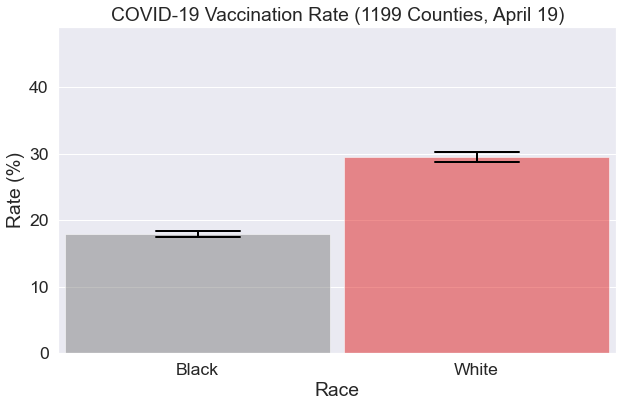

In [89]:

# newdf


from matplotlib import pyplot as plt
import seaborn

# import mylib
covidnewdf = newdf[newdf['Vaccination'] == 'COVID-19']
covidnewdf


dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)


ax.set(ylim=(0, 49))
# df.to_csv('759_rate.csv')
ax = sns.barplot(x="Race" , y="Rate (%)", palette = ['grey', 'red'], alpha = 0.5,
                 data=covidnewdf, errwidth = 2, errcolor = 'black', capsize=.3)

ax.set_title('COVID-19 Vaccination Rate (1199 Counties, April 19)')


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.95)
plt.show()



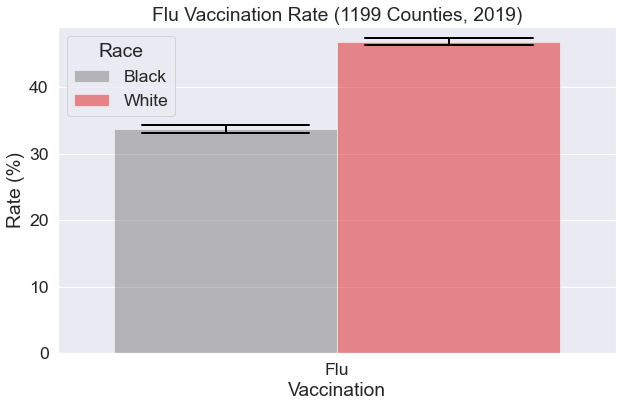

In [83]:

# newdf


from matplotlib import pyplot
import seaborn

# import mylib
flunewdf = newdf[newdf['Vaccination'] == 'Flu']
flunewdf


dims = (10, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)


ax.set(ylim=(0, 49))
# df.to_csv('759_rate.csv')
# ax = sns.barplot(x="Race" , y="Rate (%)", palette = ['grey', 'red'], alpha = 0.5,
#                  data=flunewdf,errwidth = 2, errcolor = 'black', capsize=.4)

ax = sns.barplot(x="Vaccination" , y="Rate (%)", hue = 'Race', palette = ['grey', 'red'], alpha = 0.5,
                 data=flunewdf, errwidth = 2, errcolor = 'black', capsize=.3)



ax.set_title('Flu Vaccination Rate (1199 Counties, 2019)')
# ax.s

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# change_width(ax, .5)
plt.show()


In [70]:

# import seaborn as sns
# sns.set_theme(style="whitegrid")

# val = 1.6

# sns.set(font_scale=val)



# from matplotlib import pyplot
# import seaborn

# # import mylib

# dims = (10, 6)
# # df = mylib.load_data()
# fig, ax = pyplot.subplots(figsize=dims)
# # seaborn.violinplot(ax=ax, data=df, **violin_options)

# # df.to_csv('759_rate.csv')
# ax = sns.barplot(x="Vaccination" , y="Rate (%)", hue="Race", palette = ['grey', 'red'], alpha = 0.5,
#                  data=newdf,errwidth = 1, errcolor = 'black', capsize=.3).set_title('Vaccination Rate (1180 Counties) on March 27')
# # ax.s

In [10]:
print('March 27')
Rate = RawData[['Vax_Disparity', 'Vax_Black', 'Vax_White',  'FluVax_Disparity', 'FluVax_Black', 'FluVax_White',]].mean()*100
Rate

March 27


Vax_Disparity       10.037841
Vax_Black           11.785117
Vax_White           21.822958
FluVax_Disparity    14.735537
FluVax_Black        33.590909
FluVax_White        46.873622
dtype: float64

### Distribution

(1199, 139)


/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 0.11)]

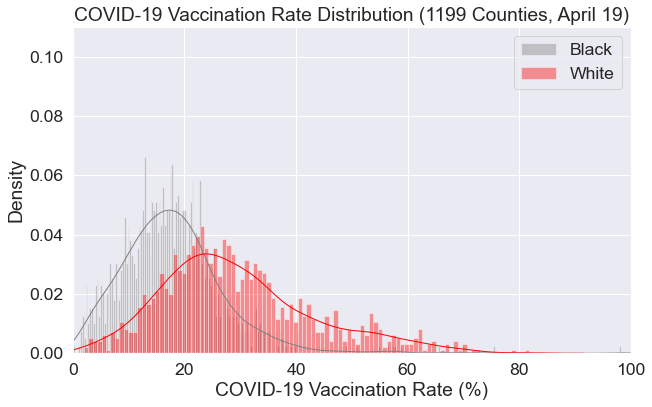

In [66]:
import pandas as pd
# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate

RawData = T2
print(RawData.shape)


dims = (10, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)

ax = sns.distplot(RawData['Vax_Black']*100, hist=True, kde=True, 
            bins=int(300), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')

ax = sns.distplot(RawData['Vax_White']*100, hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')

pyplot.legend(loc='best')

ax.set_title('COVID-19 Vaccination Rate Distribution (1199 Counties, April 19)')
ax.set(xlabel='COVID-19 Vaccination Rate (%)')
ax.set(ylabel ='Density')
ax.set(xlim=(0, 100))
ax.set(ylim=(0, 0.11))

/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 0.11)]

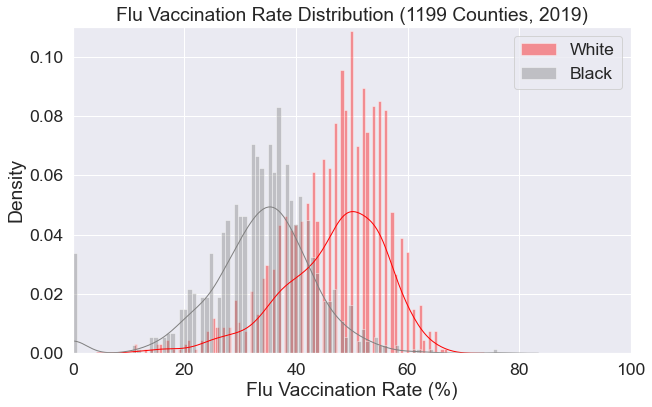

In [68]:
dims = (10, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)


# sns.set_style("whitegrid")
ax = sns.distplot(RawData['FluVax_White'] * 100, hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')
ax = sns.distplot(RawData['FluVax_Black'] * 100, hist=True, kde=True,
            bins=int(100), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')
pyplot.legend(loc='best')


ax.set_title('Flu Vaccination Rate Distribution (1199 Counties, 2019)')
ax.set(xlabel='Flu Vaccination Rate (%)')
ax.set(ylabel='Density')
ax.set(xlim=(0, 100))
ax.set(ylim=(0, 0.11))


## 759 Counties




### Scatter Matrix

In [26]:
import seaborn as sns
sns.set_theme(style="ticks")

cols = ['Vax_DisparityY', 'FluVax_DisparityY', 'MedianIncome_Disparity',  'HighSchool_Disparity', 
         'CaseRate', 'FacNumRate', 'IT_Rate',
        'republican_rate','Segregation',  'vehicle',   ]

print(cols)

df = newT2[cols]

new_cols = ['CVD (%)', 'FVD (%)', 'Income Disparity',  'High School Disparity',
          'Covid Cases', 'Health Facility Num',  'Home IT Rate', 
         'Political Ideology', 'Segregation', 'Vehicle Rate', ]
df.columns = new_cols
df

['Vax_DisparityY', 'FluVax_DisparityY', 'MedianIncome_Disparity', 'HighSchool_Disparity', 'CaseRate', 'FacNumRate', 'IT_Rate', 'republican_rate', 'Segregation', 'vehicle']


,CVD (%),FVD (%),Income Disparity,High School Disparity,Covid Cases,Health Facility Num,Home IT Rate,Political Ideology,Segregation,Vehicle Rate
0,0.183474,24.0,56.757,1.5,5.031385,0.017292,91.4,17.705595,49.890444,90.4
2,8.740260,13.0,23.524,-0.9,5.199237,0.017793,89.1,47.754846,62.099507,92.8
4,-1.448274,13.0,40.316,-3.0,10.084931,0.018564,86.5,57.266675,19.219010,94.6
5,2.164195,27.0,39.955,0.7,5.711358,0.014044,93.8,26.302324,52.702580,94.5
6,17.419047,37.0,-57.188,15.3,4.429743,0.028765,84.0,56.418093,35.769303,90.4
...,...,...,...,...,...,...,...,...,...,...
1286,8.625256,19.0,10.948,17.9,10.022095,0.035351,77.5,51.578159,27.081380,91.6
1287,0.185030,16.0,2.215,18.9,6.699972,0.016653,80.1,53.668382,25.137350,93.5
1288,6.945915,20.0,9.393,15.4,4.754581,0.006687,86.9,28.677867,21.640415,91.0
1289,2.335183,16.0,3.525,1.7,9.680177,0.046300,78.8,43.349386,30.394765,91.1


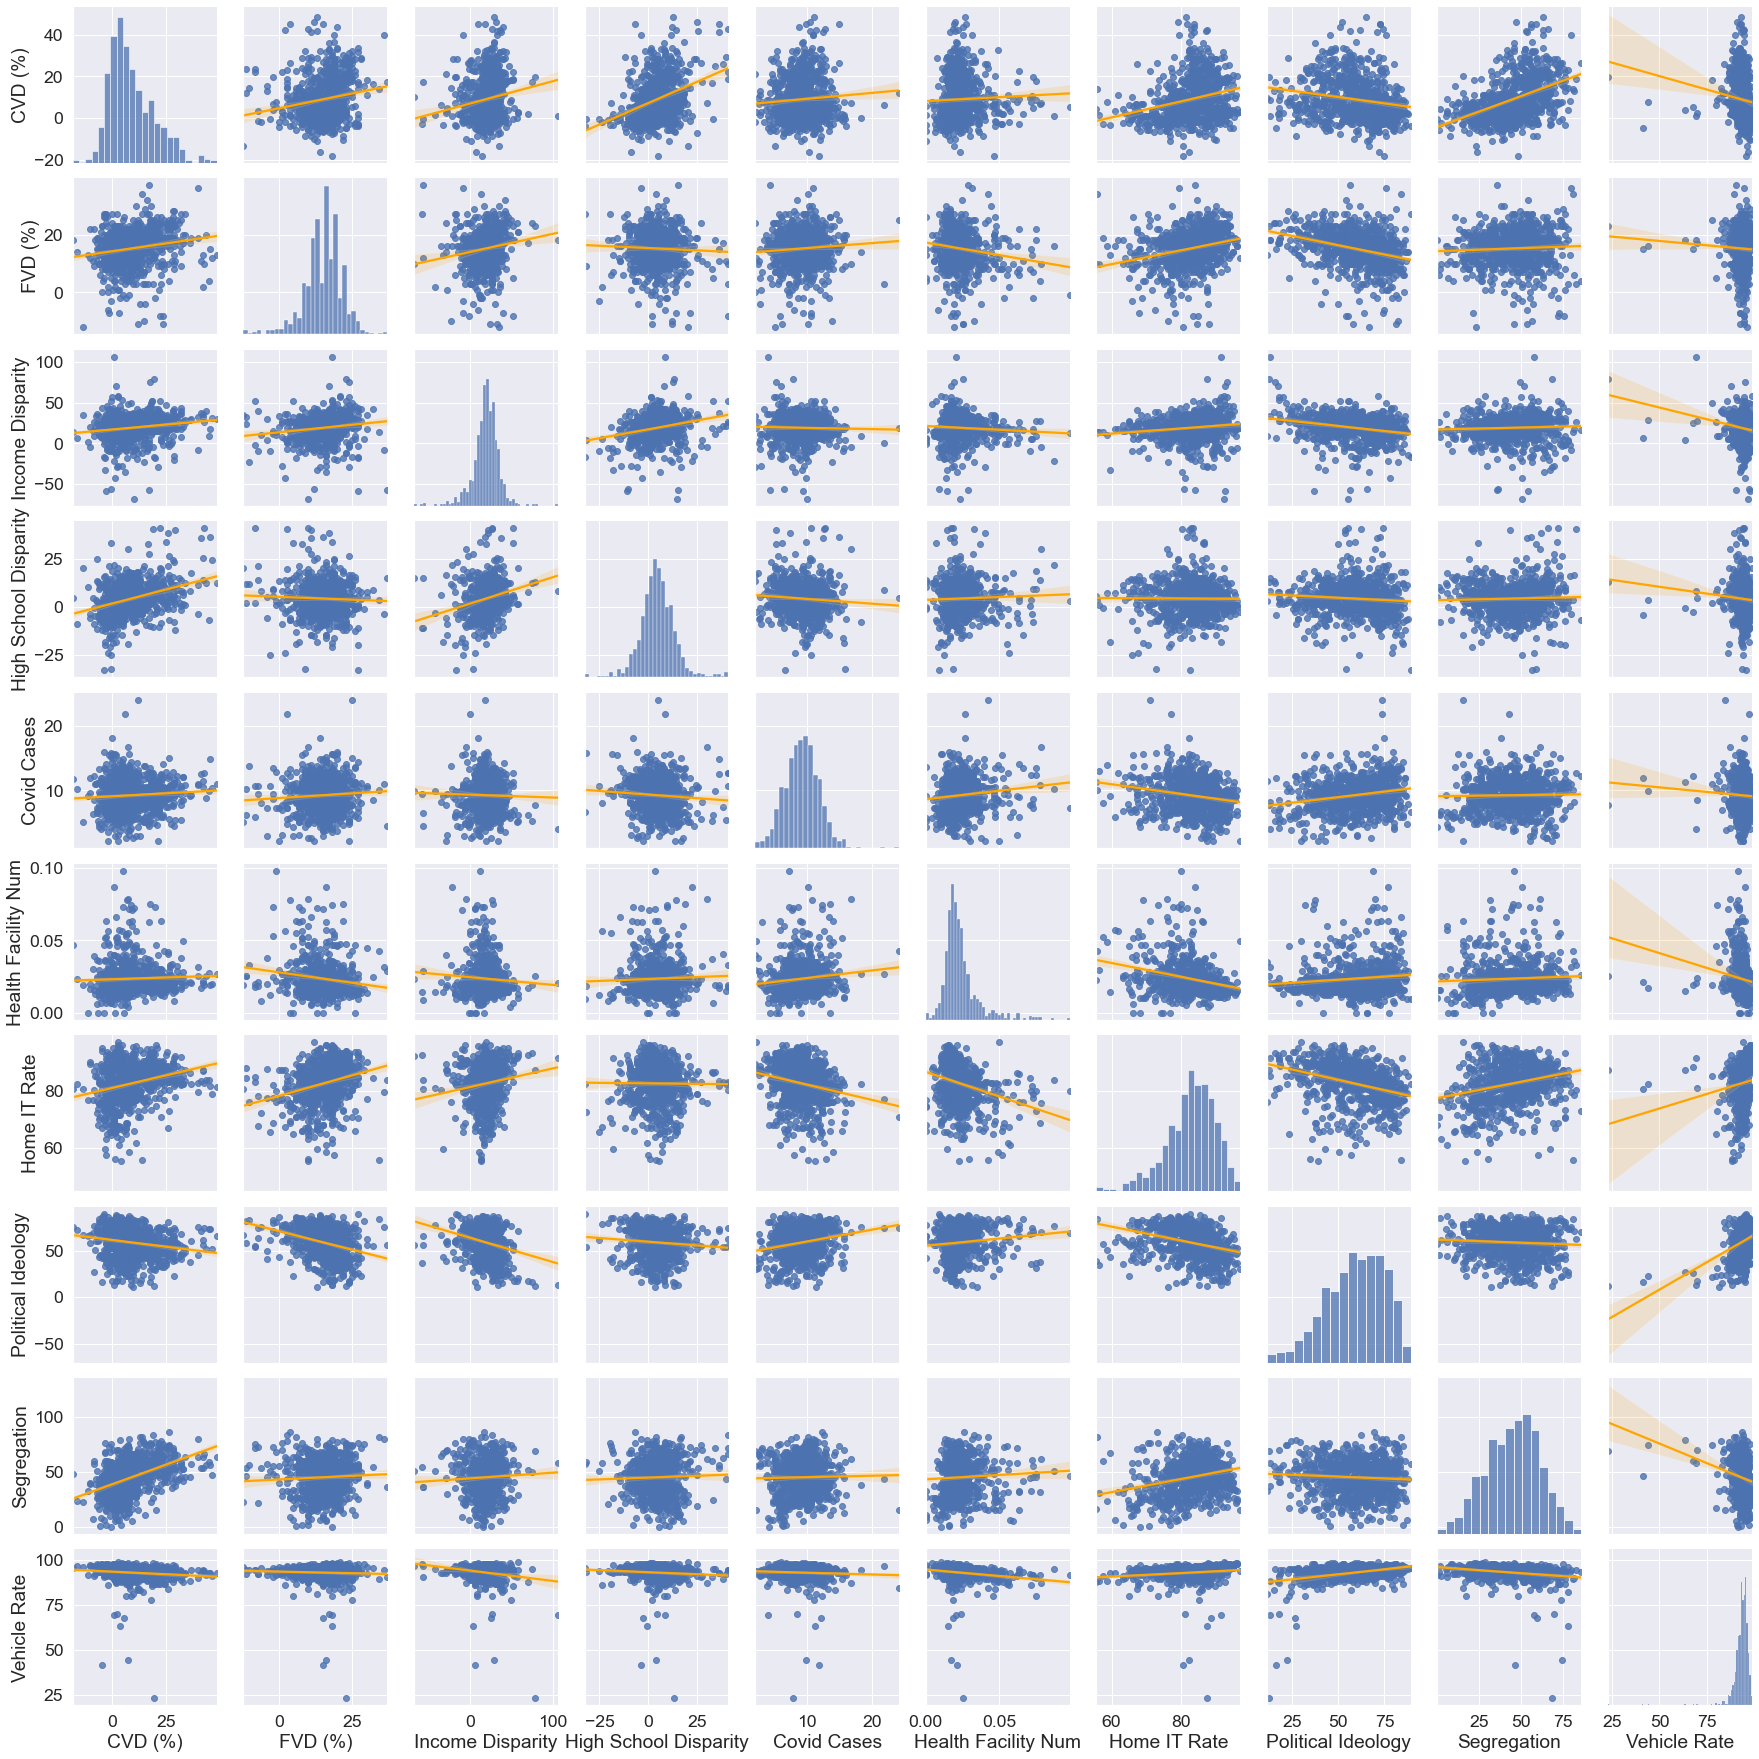

In [27]:
# winsorize 95
val = 1.6

sns.set(font_scale=val)

sns.pairplot(df, 
             kind = 'reg', 
             plot_kws= {
                 'line_kws':{'color':'orange'},
             })


